In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
data=pd.read_csv('autos.csv', sep=',', header=0, encoding='cp1252')
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [53]:
data=data.drop('dateCrawled',axis=1)
data.head()

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 19 columns):
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen               371528 non-null object
dtypes: int64(7), obje

In [55]:
data=data.drop(['dateCreated','lastSeen','nrOfPictures','abtest','postalCode','name'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 13 columns):
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dtypes: int64(5), object(8)
memory usage: 36.8+ MB


In [56]:
data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000


In [57]:
print(data.seller.unique())
print(data.offerType.unique())
y=data.price

['privat' 'gewerblich']
['Angebot' 'Gesuch']


In [58]:

data['notRepairedDamage'].fillna(value='not-declared', inplace=True)
data['fuelType'].fillna(value='not-declared', inplace=True)
data['gearbox'].fillna(value='not-declared', inplace=True)
data['vehicleType'].fillna(value='not-declared', inplace=True)
data['model'].fillna(value='not-declared', inplace=True)


In [59]:
data.isnull().sum()

seller                 0
offerType              0
price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

In [60]:
num_list=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64']]
print(num_list)

['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration']


In [61]:
data_num=data[num_list]
from sklearn.preprocessing import StandardScaler

In [62]:
data_num_transformed=StandardScaler().fit_transform(data_num)

In [63]:
data_num_transformed.shape

(371528, 5)

In [64]:
data_num_trans_df=pd.DataFrame(data=data_num_transformed[0:,0:],columns=num_list)
data_num_trans_df=data_num_trans_df.drop('price',axis=1)
data_num_trans_df.head()

,yearOfRegistration,powerPS,kilometer,monthOfRegistration
0,-0.124674,-0.601384,0.607827,-1.544670
1,0.069153,0.387482,-0.015424,-0.197835
2,-0.006224,0.246959,-0.015424,0.610266
3,-0.038528,-0.211042,0.607827,0.071532
4,0.036849,-0.242269,-0.887975,0.340899


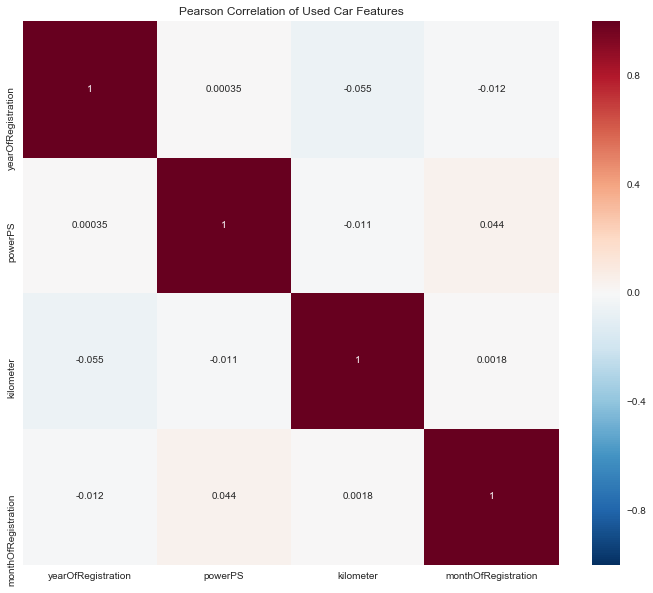

In [66]:
import seaborn as sns
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Used Car Features')
# Draw the heatmap using seaborn

sns.heatmap(check_df.astype(float).corr(),annot=True)

gearbox
manuell         274214
automatik        77105
not-declared     20209
Name: gearbox, dtype: int64


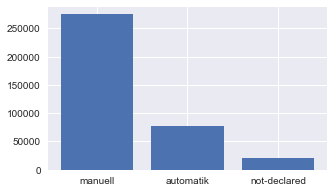

model
golf            30070
andere          26400
3er             20567
not-declared    20484
polo            13092
Name: model, dtype: int64


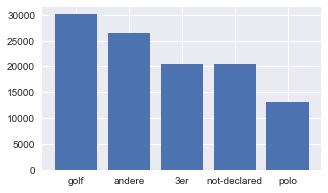

brand
volkswagen       79640
bmw              40274
opel             40136
mercedes_benz    35309
audi             32873
Name: brand, dtype: int64


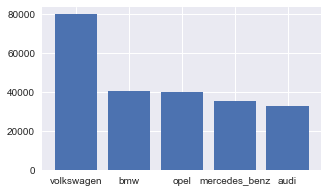

vehicleType
limousine       95894
kleinwagen      80023
kombi           67564
not-declared    37869
bus             30201
Name: vehicleType, dtype: int64


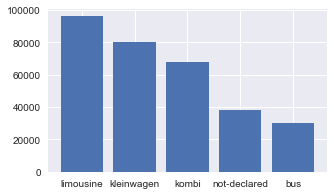

fuelType
benzin          223857
diesel          107746
not-declared     33386
lpg               5378
cng                571
Name: fuelType, dtype: int64


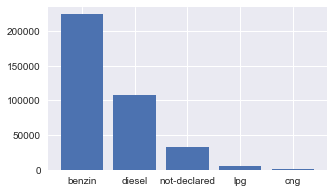

notRepairedDamage
nein            263182
not-declared     72060
ja               36286
Name: notRepairedDamage, dtype: int64


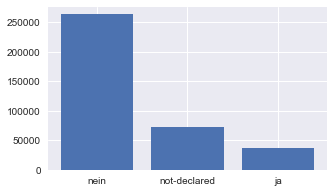

In [67]:
categories = ['gearbox', 'model', 'brand', 'vehicleType', 'fuelType', 'notRepairedDamage']

for i, c in enumerate(categories):
    v = data[c].unique()
    
    g = data.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print( g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    #plt.xticks(r, v)
    plt.xticks(r, g.index)
    plt.show()

In [68]:
obj_list=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]
print(obj_list)

['seller', 'offerType', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage']


In [69]:
data_obj=data[obj_list]

In [70]:
data_obj_final=pd.get_dummies(data_obj)

In [71]:
data_obj_final.head()

,seller_gewerblich,seller_privat,offerType_Angebot,offerType_Gesuch,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,...,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_ja,notRepairedDamage_nein,notRepairedDamage_not-declared
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [73]:
X_final=pd.concat([data_num_trans_df,data_obj_final],axis=1)

In [74]:
X_final.shape

(371528, 323)

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_final,y,test_size=0.3)

In [77]:
X_train.shape
Y_train.shape

(260069,)

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
clf=RandomForestRegressor(random_state=0)
clf.fit(X_train,Y_train)
pred=clf.predict(X_test)
print('Accuracy :', r2_score(Y_test,pred))

Accuracy : -12.3561794922
